# Tic Tac Toe - Reinforcement Learning

![img](http://img1.encyclopedie-incomplete.com/local/cache-vignettes/L440xH381/morpion_tic-tac-toe-b3a0a.jpg)

##### Introduction

SOON

###### Links and references

- [Udemy course on RL](https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python/)  
- [Deep Reinforcement Learning: Pong from Pixels](http://karpathy.github.io/2016/05/31/rl/) Andrej Karpathy's blog article on RL (always a reference)


Actually this notebook was written while I was watching the Udemy course on deep reinforcement learning. <br>
I was able to fully implement this example before seeing the solution shown in the course.<br>
However, I thank the course for teaching me : 
* SOON

##### Libraries

In [25]:
# Usual
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append("C:/git/ai-library/")

# Autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
% matplotlib inline

# Seaborn config
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

# Deep Learning (Keras, Tensorflow)
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop, Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D,ZeroPadding2D,Conv2D
from keras.utils.np_utils import to_categorical

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Import the Tic Tac Toe library
To improve readibility and adopt a library oriented philosophy, most of the code is written in my general purpose AI library.<br>
Available in the repo https://github.com/TheoLvs/ai-library/blob/master/ai/rl/tictactoe.py

In [26]:
from ai.rl.tictactoe import *

***

# Set up the environment
To model this problem, we will take an Oriented Object Programming approach and define :  
- A grid made of cells
- An AI agent trained by RL and a AI agent that knows rules
- An environment for the agents to discover the grid with rules
- A Game to simulate a run of the Tic Tac Toe Game 

## Define the grid
In this section I will describe the modelling approach for those type of problems. <br>
I will show sections of the code, but the full reasoning is available at https://github.com/TheoLvs/ai-library/blob/master/ai/rl/tictactoe.py


### Cell
I could have considered a tic tac toe grid as a numpy matrix. <br> 
But I prefer the approach of taking a grid of 3x3 "Cell" objects with more properties. <br>
Thus I defined a Cell class with a few properties : 
- a **value** attribute : 0 for an empty cell, 1 for a cell occuped by the first player, 2 for a cell occupied by the second
- a **vectorizing** method : to encode the value in a one hot vector, example [0,0,1] for a value of 2, this is how we will consider a cell value for the RL part
- a **representation** to display a game : empty if not occupied, otherwise "x" for player 1 and "o" for player 2

### Grid

## Define the agents

### The agent baseline

### The Human agent

### The random AI agent

### The rules-based AI agent

### The RL AI agent

## Define the game

# Some games

## Between Human and AI random

## Between two random AIs

## Between rules-based AI and random AI

# Training the Reinforcement Learning AI agent

# Experiments

***
# WORK IN PROGRESS

In [41]:
a = Grid()
# a.set_value((1,1),1)
a.set_value((2,2),2)
a

|   |   |   |
|   |   |   |
|   |   | o |


3x3 TicTacToe grid

In [85]:
player1 = Human_Agent()
player2 = AI_RL_Agent()
g = Game(player1,player2)

In [86]:
g.run_episode()

| x |   | o |
|   |   | o |
| x |   | o |
3x3 TicTacToe grid
>>> Player 2 has won !!


In [84]:
g.run_n_episodes(1000)

  0%|                                                 | 0/1000 [00:00<?, ?it/s]


ValueError: not enough values to unpack (expected 4, got 2)

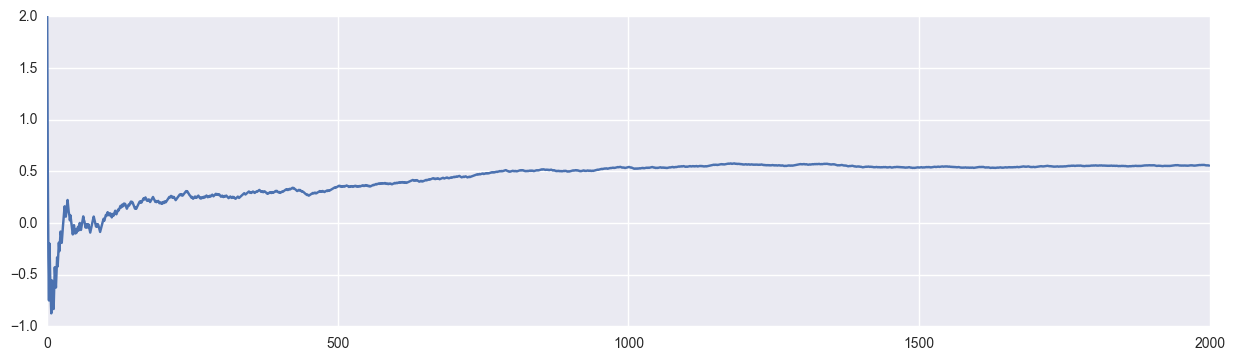

In [78]:
plt.figure(figsize = (15,4))
plt.plot(np.cumsum(player2.running_rewards)/np.array(range(1,len(player2.running_rewards)+1)))
plt.show()